In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import os

### 경남 노인 인구 분포- 경남 전체 통합 데이터

In [7]:
# Shapefile 파일이 있는 디렉토리 경로
directory_path = "../data/경남 노인 인구 분포/"

# Shapefile 파일 경로를 모두 가져오기
shapefile_paths = glob.glob(os.path.join(directory_path, "**/*.shp"))

gdfs = []

# 각 Shapefile을 읽어 리스트에 추가
for shapefile in shapefile_paths:
    gdf = gpd.read_file(shapefile, encoding="utf-8")
    gdfs.append(gdf)

# 모든 GeoDataFrame을 하나로 병합
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))


merged_gdf['val'] = merged_gdf['val'].fillna(0)
merged_gdf = merged_gdf.to_crs(epsg=5179)


### 경남 지도

In [14]:
emd_geo = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949", 
    )

emd_geo = emd_geo[emd_geo["EMD_CD"].apply(lambda x: x[:2] == "48")]

emd_geo = emd_geo.set_crs(crs="EPSG:5179")

### 경남지도에서 노인인구 분포

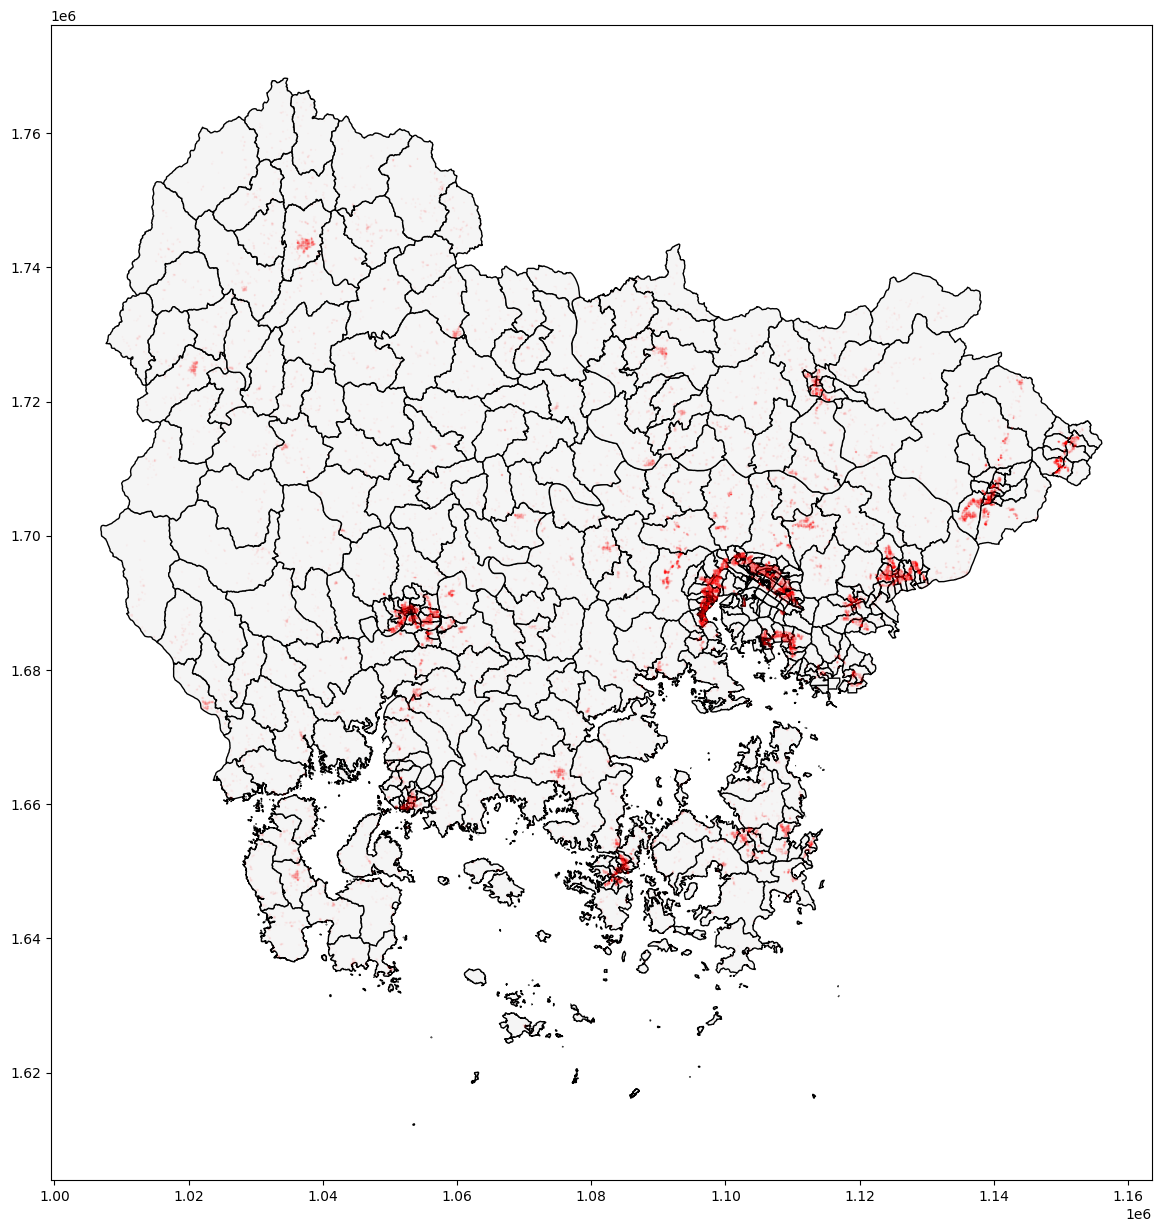

In [16]:
norm = Normalize(vmin=merged_gdf['val'].min(), vmax=merged_gdf['val'].max())
ax = emd_geo.plot(
    figsize = (20, 15), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)
merged_gdf.plot(
    ax=ax,
    figsize = (20, 15), 
    color = "red",
    alpha = norm(merged_gdf['val']),
    edgecolor = "red", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)

plt.show()
